<h1 align="center"> What Makes an Airbnb Superhost? </h1>
<h2 align="center"> An Exploratory Analysis of AirBNB Reviews</h2>
<h3 align="center"> By: John Easter, Josh Elam, Weitao Fu, Emily Moreland, Ryan Wainz </h3>
<h3 align="center"> Last Update: 05/04/2020 </h3>

# 1. Introduction

Airbnb, Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. The company is based in San Francisco, California, United States. 

Since its founding in 2008, Airbnb has been one of the top travel sites for people who really want to be immersed in their destination city.

On the Airbnb platform, users have the opportunity to choose their lodging based on price, type of room, number of bedrooms, and most importantly, reviews left by past guests. Hosts also have the opportunity to gain the distinction of a “superhost”, which means that they have provided consistent hospitality to their guests and continue to go above and beyond for those staying in their home.

With our project we plan to make the customer absolutely clear on what specific property they should pursue based on their specific needs so they can have the best experience possible. 

Through this project, we want to answer the following questions:
* What makes someone a good host and gives them a “superhost” title?
     * Superhosts are important for letting the potential renter know that they are renting from an extraordinary and experienced host. 
     
* What types of attributes give listings good/bad reviews?
    * Cleanliness, location relative to popular tourists' sites, amenities (Netflix, Hulu, Cable), price, house rules, and host interactions with guests.
    
* How can we use a predictive model to estimate the quality of a listing?
    * Using a model tailored specifically for you and your needs on your trip.
    
* Which listing should we recommend to customers if they have special needs such as religions, pets, parking, disabilities, and children?
    * While pets and other commodities have made their way to the mainstream amenities for AirBnb's many hosts still do not factor in religion beliefs and disabilities into their rental properties. 
    
<img src='download.png'>

# 2. Data

We found our data set at the following link: https://www.kaggle.com/airbnb/seattle#listings.csv

Key information regarding what makes a "superhost" would be:
* Host response rate
* Host response time
* Experiences offered
* Amenitites
* Price
* Number of reviews
* Review scores rating

This data was directly scraped from the Airbnb website here: https://www.airbnb.com/s/Seattle--WA--United-States/all 

# 3. Data Manipulation

## 3.1 Calendar Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
cal = pd.read_csv("calendar.csv")
cal.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [2]:
cal.info
pd.crosstab(index=cal['listing_id'],columns="count")
cal = cal.dropna()
pd.crosstab(index=cal['listing_id'],columns="count")

col_0       count
listing_id       
3335          309
4291          365
5682          309
6606          365
7369           53
...           ...
10331249      354
10332096      365
10334184      361
10339145      365
10340165      358

[3723 rows x 1 columns]

* listing_id: Id for each listing.<br>
* date: A date from 01/04/2016 to 01/02/2017.<br>
* available: Availability of a listing in a specific date.<br>
* Price: Rent price of a listing in a specific date.<br>

Cal dataset stores the daily rent price of 3818 listings in a year.

In [3]:
# Enable inline plotting in notebook
%matplotlib inline

### 3.1.1 Variable Transformation

We need to change the datatype of the price column to be a number so we will be able to use it in visualizations

In [4]:
cal
cal['price'] = cal['price'].astype(str) 
cal['price'] = cal['price'].str.replace('$','')
cal['price'] = cal['price'].str.replace(',','')  # remove ',' of '1,234' 
cal['price'] = cal['price'].astype(float) 
cal['date']=pd.to_datetime(cal['date'])
cal.head()

listing_id       date available  price
0       241032 2016-01-04         t   85.0
1       241032 2016-01-05         t   85.0
9       241032 2016-01-13         t   85.0
10      241032 2016-01-14         t   85.0
14      241032 2016-01-18         t   85.0

We also want to change our date to be a date/time object

In [5]:
cal['month'] = pd.DatetimeIndex(cal['date']).month

### 3.1.2 Average Prices

With these changes, we can easily see what our average price by month is

In [6]:
averagePriceByMonth = cal.groupby('month')['price'].mean()
# average price of all listings in a month
averagePriceByMonth

month
1     122.912176
2     124.293927
3     128.644488
4     135.097005
5     139.538183
6     147.473137
7     152.094150
8     150.656594
9     143.255949
10    137.031939
11    135.688738
12    137.251835
Name: price, dtype: float64

In [7]:
averagePrice= pd.DataFrame(averagePriceByMonth)
averagePrice['month']= pd.Series(range(0,13))
averagePrice

price  month
month                   
1      122.912176      1
2      124.293927      2
3      128.644488      3
4      135.097005      4
5      139.538183      5
6      147.473137      6
7      152.094150      7
8      150.656594      8
9      143.255949      9
10     137.031939     10
11     135.688738     11
12     137.251835     12

Text(0.5, 1.0, 'Average Price of All Listings by Months')

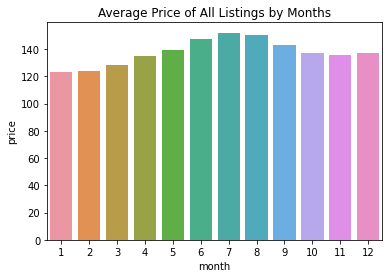

In [8]:
sns.barplot(x='month',y='price', data=averagePrice).set_title('Average Price of All Listings by Months')

As well as the listing's average price for the entire year.

In [9]:
cal.groupby('listing_id')['price'].mean() # Calculate the average rent price of each listing.

listing_id
3335        120.000000
4291         82.000000
5682         53.944984
6606         92.849315
7369         85.000000
               ...    
10331249     45.000000
10332096     40.000000
10334184    120.000000
10339145    237.904110
10340165     43.000000
Name: price, Length: 3723, dtype: float64

## 3.2 Reviews Dataset

In [10]:
rev = pd.read_csv("reviews.csv")
rev.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [11]:
pd.crosstab(index=rev['listing_id'],columns="count")

col_0       count
listing_id       
4291           35
5682          297
6606           52
7369           40
9419           79
...           ...
9995551         1
10012724        2
10020221        1
10118341        1
10248139        1

[3191 rows x 1 columns]

In [12]:
rev = rev.drop(columns=['id', 'reviewer_id','reviewer_name'])
rev

listing_id        date  \
0         7202016  2015-07-19   
1         7202016  2015-07-20   
2         7202016  2015-07-26   
3         7202016  2015-08-02   
4         7202016  2015-08-10   
...           ...         ...   
84844     3624990  2015-10-12   
84845     3624990  2015-10-17   
84846     3624990  2015-10-20   
84847     3624990  2015-11-02   
84848     9727246  2015-12-13   

                                                comments  
0      Cute and cozy place. Perfect location to every...  
1      Kelly has a great room in a very central locat...  
2      Very spacious apartment, and in a great neighb...  
3      Close to Seattle Center and all it has to offe...  
4      Kelly was a great host and very accommodating ...  
...                                                  ...  
84844  The description and pictures of the apartment ...  
84845  We had an excellent stay. It was clean and com...  
84846  Gran ubicación, cerca de todo lo atractivo del...  
84847  Very good apartement, clean and well sized. Si...  
84848  Breanne was a great host. Check in was easy, s...  

[84849 rows x 3 columns]

In [13]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  84849 non-null  int64 
 1   date        84849 non-null  object
 2   comments    84831 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [14]:
rev = rev.dropna()

In [15]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  84831 non-null  int64 
 1   date        84831 non-null  object
 2   comments    84831 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


### 3.2.1 String Manipulation

In order to effectively parse through the review comments, we need to change the case of the words so they don't show up multiple times in a count.

In [16]:
rev['newComments']=rev.comments.str.replace('[^a-zA-Z]', ' ').str.lower()

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
rev = rev.drop(columns=['comments'])
rev

listing_id        date  \
0         7202016  2015-07-19   
1         7202016  2015-07-20   
2         7202016  2015-07-26   
3         7202016  2015-08-02   
4         7202016  2015-08-10   
...           ...         ...   
84844     3624990  2015-10-12   
84845     3624990  2015-10-17   
84846     3624990  2015-10-20   
84847     3624990  2015-11-02   
84848     9727246  2015-12-13   

                                             newComments  
0      cute and cozy place  perfect location to every...  
1      kelly has a great room in a very central locat...  
2      very spacious apartment  and in a great neighb...  
3      close to seattle center and all it has to offe...  
4      kelly was a great host and very accommodating ...  
...                                                  ...  
84844  the description and pictures of the apartment ...  
84845  we had an excellent stay  it was clean and com...  
84846  gran ubicaci n  cerca de todo lo atractivo del...  
84847  very good apartement  clean and well sized  si...  
84848  breanne was a great host  check in was easy  s...  

[84831 rows x 3 columns]

Get the most mentioned words from customers' review.

In [18]:
from collections import Counter
Counter(" ".join(rev["newComments"]).split()).most_common(100)

[('and', 289516),
 ('the', 286232),
 ('to', 175381),
 ('a', 175367),
 ('was', 163778),
 ('in', 100347),
 ('we', 97600),
 ('is', 89165),
 ('i', 81980),
 ('of', 73385),
 ('very', 72242),
 ('for', 68102),
 ('it', 61622),
 ('great', 60983),
 ('with', 55056),
 ('stay', 52128),
 ('place', 45537),
 ('s', 40637),
 ('seattle', 40322),
 ('our', 39789),
 ('were', 38493),
 ('had', 36056),
 ('you', 35261),
 ('this', 31927),
 ('us', 31884),
 ('my', 30148),
 ('at', 30128),
 ('as', 30121),
 ('clean', 29361),
 ('location', 28761),
 ('there', 26809),
 ('would', 26275),
 ('apartment', 26031),
 ('that', 26030),
 ('on', 25331),
 ('comfortable', 25215),
 ('but', 24536),
 ('nice', 23168),
 ('house', 22943),
 ('so', 22586),
 ('from', 22553),
 ('all', 21109),
 ('host', 21033),
 ('room', 20991),
 ('home', 20754),
 ('again', 20241),
 ('everything', 19825),
 ('she', 19252),
 ('t', 19166),
 ('have', 18361),
 ('neighborhood', 18236),
 ('easy', 18163),
 ('are', 18152),
 ('time', 17913),
 ('an', 17661),
 ('her', 1723

The following words will be useful to determine whether a listing is nice: 'clean','location','apartment','comfortable','house','host','home','everything','neighborhood','easy','downtown','space','quiet','experience',<br>'close','restaurants','area','bed','needed','helpful','walking','beautiful','friendly'

In [19]:
documents= list(['clean','location','apartment','comfortable','house','host','home','everything','neighborhood','easy','downtown','space','quiet','experience',
'close','restaurants','area','bed','needed','helpful','walking','beautiful','friendly'])

(-0.5, 399.5, 199.5, -0.5)

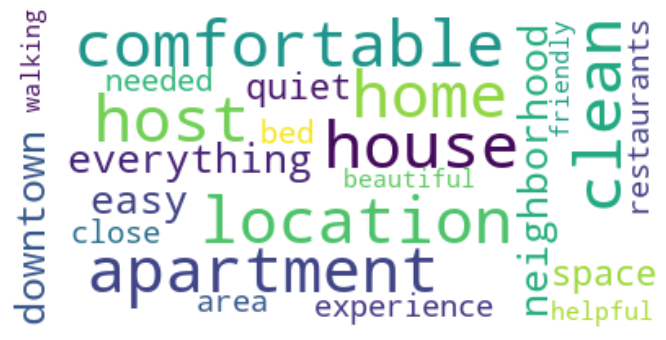

In [20]:
# Import wordcloud module
from wordcloud import WordCloud

# Combine all review documents together
text = " ".join(str(x) for x in documents)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white",max_font_size=40)

wordcloud.generate_from_text(text)

# Display the generated image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
#ax.set_axis_bgcolor("lightslategray")
plt.axis("off")

### 3.2.2 Variable Transformation

Again, we need to change our date column to be a date/time object to better analyze the data over a timeframe.

In [21]:
rev['date']=pd.to_datetime(rev['date'])
rev.head()

listing_id       date                                        newComments
0     7202016 2015-07-19  cute and cozy place  perfect location to every...
1     7202016 2015-07-20  kelly has a great room in a very central locat...
2     7202016 2015-07-26  very spacious apartment  and in a great neighb...
3     7202016 2015-08-02  close to seattle center and all it has to offe...
4     7202016 2015-08-10  kelly was a great host and very accommodating ...

In [22]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   84831 non-null  int64         
 1   date         84831 non-null  datetime64[ns]
 2   newComments  84831 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.6+ MB


In [23]:
rev['month'] = pd.DatetimeIndex(rev['date']).month
rev

listing_id       date  \
0         7202016 2015-07-19   
1         7202016 2015-07-20   
2         7202016 2015-07-26   
3         7202016 2015-08-02   
4         7202016 2015-08-10   
...           ...        ...   
84844     3624990 2015-10-12   
84845     3624990 2015-10-17   
84846     3624990 2015-10-20   
84847     3624990 2015-11-02   
84848     9727246 2015-12-13   

                                             newComments  month  
0      cute and cozy place  perfect location to every...      7  
1      kelly has a great room in a very central locat...      7  
2      very spacious apartment  and in a great neighb...      7  
3      close to seattle center and all it has to offe...      8  
4      kelly was a great host and very accommodating ...      8  
...                                                  ...    ...  
84844  the description and pictures of the apartment ...     10  
84845  we had an excellent stay  it was clean and com...     10  
84846  gran ubicaci n  cerca de todo lo atractivo del...     10  
84847  very good apartement  clean and well sized  si...     11  
84848  breanne was a great host  check in was easy  s...     12  

[84831 rows x 4 columns]

In [24]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   84831 non-null  int64         
 1   date         84831 non-null  datetime64[ns]
 2   newComments  84831 non-null  object        
 3   month        84831 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ MB


### 3.2.3 Reviews Per Month

Here, we can easily see how many reviews are posted per month

In [25]:
reviewCount = pd.crosstab(index=rev['month'],columns="count")
reviewCount['month']= pd.Series(range(0,13))
reviewCount

col_0  count  month
month              
1       2864      1
2       2642      2
3       4157      3
4       4231      4
5       5853      5
6       8542      6
7      10501      7
8      13017      8
9      11675      9
10      8954     10
11      6665     11
12      5730     12

Text(0.5, 1.0, 'Reviews Posted Each Month')

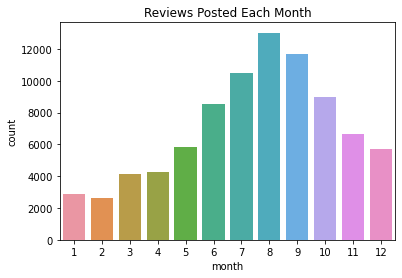

In [26]:
sns.barplot(x='month',y='count', data=reviewCount).set_title('Reviews Posted Each Month')

## 3.3 Listings Dataset

In [27]:
lis = pd.read_csv("listings.csv")
lis.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [28]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [29]:
lis = lis.drop(columns=['host_name', 'host_identity_verified','is_location_exact','bathrooms','bedrooms',
                        'beds','guests_included','calendar_updated','has_availability',
                        'require_guest_phone_verification','requires_license','square_feet','license',
                        'weekly_price','monthly_price','security_deposit','cleaning_fee'])
lis

id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Stylish Queen Anne Apartment   
1      2016-01-04   Bright & Airy Queen Anne Apartment   
2      2016-01-04  New Modern House-Amazing water view   
3      2016-01-04                   Queen Anne Chateau   
4      2016-01-04       Charming craftsman 3 bdm house   
...           ...                                  ...   
3813   2016-01-04   3BR Mountain View House in Seattle   
3814   2016-01-04    Portage Bay View!-One Bedroom Apt   
3815   2016-01-04    Private apartment view of Lake WA   
3816   2016-01-04    Amazing View with Modern Comfort!   
3817   2016-01-04            Large Lakefront Apartment   

                                                summary  \
0                                                   NaN   
1     Chemically sensitive? We've removed the irrita...   
2     New modern house built in 2013.  Spectacular s...   
3     A charming apartment that sits atop Queen Anne...   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...   
3814  800 square foot 1 bedroom basement apartment w...   
3815  Very comfortable lower unit. Quiet, charming m...   
3816  Cozy studio condo in the heart on Madison Park...   
3817  All hardwood floors, fireplace, 65" TV with Xb...   

                                                  space  \
0     Make your self at home in this charming one-be...   
1     Beautiful, hypoallergenic apartment in an extr...   
2     Our house is modern, light and fresh with a wa...   
3                                                   NaN   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house bright, stylish, and wheelch...   
3814  This space has a great view of Portage Bay wit...   
3815                                                NaN   
3816  Fully furnished unit to accommodate most needs...   
3817                                                NaN   

                                            description experiences_offered  \
0     Make your self at home in this charming one-be...                none   
1     Chemically sensitive? We've removed the irrita...                none   
2     New modern house built in 2013.  Spectacular s...                none   
3     A charming apartment that sits atop Queen Anne...                none   
4     Cozy family craftman house in beautiful neighb...                none   
...                                                 ...                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...                none   
3814  800 square foot 1 bedroom basement apartment w...                none   
3815  Very comfortable lower unit. Quiet, charming m...                none   
3816  Cozy studio condo in the heart on Madison Park...                none   
3817  All hardwood floors, fireplace, 65" TV with Xb...                none   

                                  neighborhood_overview  ...  \
0      

In [30]:
lis = lis.dropna()
lis = lis.reset_index(drop=True)
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1147 non-null   int64  
 1   listing_url                     1147 non-null   object 
 2   scrape_id                       1147 non-null   int64  
 3   last_scraped                    1147 non-null   object 
 4   name                            1147 non-null   object 
 5   summary                         1147 non-null   object 
 6   space                           1147 non-null   object 
 7   description                     1147 non-null   object 
 8   experiences_offered             1147 non-null   object 
 9   neighborhood_overview           1147 non-null   object 
 10  notes                           1147 non-null   object 
 11  transit                         1147 non-null   object 
 12  thumbnail_url                   11

### 3.3.1 Basic Host Information

Host response time is a big factor in the happiness of an Airbnb guest

In [31]:
responseTime=pd.crosstab(index=lis['host_response_time'],columns="count")

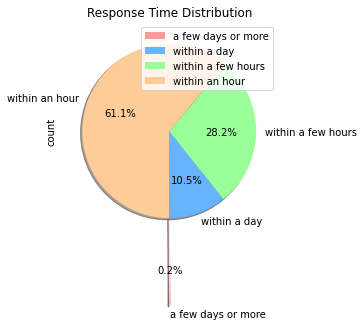

In [32]:
responseTime.plot.pie(y='count', title = "Response Time Distribution", 
                      colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                      shadow=True,autopct='%1.1f%%',startangle=-90,
                     explode = (1, 0, 0, 0))


Hosts often list more than one property as well.

In [33]:
hostId = pd.crosstab(index=lis['host_id'],columns="listingCount") 
hostId

col_0     listingCount
host_id               
4193                 1
6207                 1
11775                1
30559                2
30604                1
...                ...
48604323             1
49123244             1
49310311             1
50201633             2
50586425             1

[817 rows x 1 columns]

In [34]:
 pd.crosstab(index=hostId['listingCount'],columns="peopleCount")  # distribution of the number of listings a host has

col_0         peopleCount
listingCount             
1                     659
2                     115
3                      20
4                      10
5                       3
6                       2
7                       1
9                       3
13                      1
21                      1
31                      1
32                      1

We can see how many hosts are considered "superhosts".

In [35]:
superhostCount = lis[['host_id','host_is_superhost']].copy()
superhostCount = superhostCount.drop_duplicates(subset='host_id', keep="first") # drop duplicate hosts
pd.crosstab(index=superhostCount['host_is_superhost'],columns="count")

col_0              count
host_is_superhost       
f                    544
t                    273

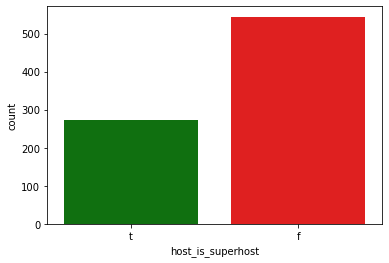

In [36]:
sns.countplot(x="host_is_superhost", data=superhostCount, palette=['green','red'])
plt.show()

### 3.3.2 Amenities

Hosts have the abilities to list what amenities their homes might have, such as kitchen access, pets, and toiletries.

In [37]:
lis['newAmenities']=lis.amenities.str.replace('[^a-zA-Z]', ' ').str.lower()

We can see here the most common amenities listed by Airbnb hosts

In [38]:
Counter(" ".join(lis["newAmenities"]).split()).most_common(100)

[('internet', 1994),
 ('detector', 1872),
 ('wireless', 1276),
 ('tv', 1197),
 ('dryer', 1167),
 ('heating', 1114),
 ('essentials', 1059),
 ('smoke', 1043),
 ('on', 1020),
 ('kitchen', 1006),
 ('shampoo', 910),
 ('washer', 884),
 ('friendly', 860),
 ('carbon', 829),
 ('monoxide', 829),
 ('fire', 775),
 ('extinguisher', 775),
 ('free', 671),
 ('parking', 671),
 ('premises', 671),
 ('first', 627),
 ('aid', 627),
 ('kit', 627),
 ('family', 617),
 ('kid', 617),
 ('pets', 446),
 ('cable', 446),
 ('in', 409),
 ('s', 346),
 ('live', 314),
 ('this', 314),
 ('property', 314),
 ('hangers', 287),
 ('hair', 280),
 ('safety', 279),
 ('card', 279),
 ('iron', 259),
 ('laptop', 243),
 ('workspace', 243),
 ('indoor', 239),
 ('fireplace', 239),
 ('hour', 213),
 ('check', 213),
 ('air', 211),
 ('conditioning', 211),
 ('elevator', 196),
 ('building', 196),
 ('dog', 175),
 ('allowed', 159),
 ('cat', 150),
 ('buzzer', 148),
 ('intercom', 148),
 ('breakfast', 119),
 ('gym', 114),
 ('hot', 90),
 ('tub', 90),


(-0.5, 399.5, 199.5, -0.5)

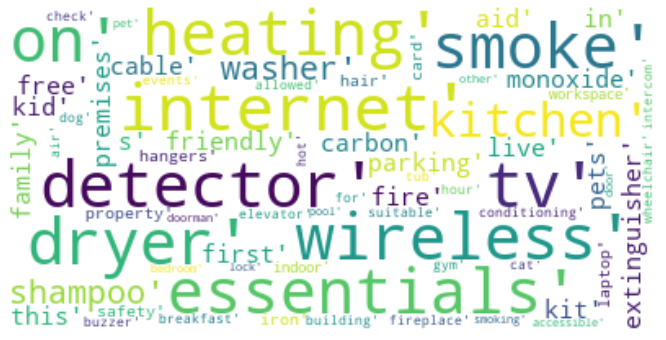

In [39]:
# Combine all review documents together
text = " ".join(str(x) for x in Counter(" ".join(lis["newAmenities"]).split()).most_common(100))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white",max_font_size=40)

wordcloud.generate_from_text(text)

# Display the generated image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
#ax.set_axis_bgcolor("lightslategray")
plt.axis("off")

In [40]:
lis.head(3).transpose()

0  \
id                                                                         953595   
listing_url                                   https://www.airbnb.com/rooms/953595   
scrape_id                                                          20160104002432   
last_scraped                                                           2016-01-04   
name                                           Bright & Airy Queen Anne Apartment   
...                                                                           ...   
cancellation_policy                                                        strict   
require_guest_profile_picture                                                   t   
calculated_host_listings_count                                                  6   
reviews_per_month                                                            1.48   
newAmenities                     tv internet  wireless internet  kitchen  free...   

                                                                                1  \
id                                                                        1909058   
listing_url                                  https://www.airbnb.com/rooms/1909058   
scrape_id                                                          20160104002432   
last_scraped                                                           2016-01-04   
name                                              Queen Anne Private Bed and Bath   
...                                                                           ...   
cancellation_policy                                                      moderate   
require_guest_profile_picture                                                   f   
calculated_host_listings_count                                                  1   
reviews_per_month                                                            2.46   
newAmenities                      wireless internet   free parking on premises...   

                                                                                2  
id                                                                         856550  
listing_url                                   https://www.airbnb.com/rooms/856550  
scrape_id                                                          20160104002432  
last_scraped                                                           2016-01-04  
name                                            Tiny Garden cabin on Queen Anne    
...                                                                           ...  
cancellation_policy                                                        strict  
require_guest_profile_picture                                                   t  
calculated_host_listings_count                                                  5  
reviews_per_month                                                            4.73  
newAmenities                      wireless internet   pets live on this proper...  

[76 rows x 3 columns]

Different amenities are important to different guests. The following function will allow us to search through all the listings to find specific amentities that guests want.

In [41]:
def contains_word(s, w):
    return w in s
amenities = lis['newAmenities'].tolist()
find_word = pd.Series()
for s in amenities:
    find_word = find_word.append(pd.Series(contains_word(s, 'pet')))
    find_word

pd.crosstab(index=find_word,columns="Count") 

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


col_0  Count
row_0       
False    762
True     385

## 3.4 Summary Statistics and Correlation Analysis

In [42]:
# get the summary statistics for all three data sets
lis.describe().transpose()

count          mean           std  \
id                              1147.0  4.761794e+06  2.581058e+06   
scrape_id                       1147.0  2.016010e+13  0.000000e+00   
host_id                         1147.0  1.275422e+07  1.197325e+07   
host_listings_count             1147.0  9.039233e+00  2.829946e+01   
host_total_listings_count       1147.0  9.039233e+00  2.829946e+01   
latitude                        1147.0  4.762743e+01  4.471330e-02   
longitude                       1147.0 -1.223309e+02  3.217009e-02   
accommodates                    1147.0  3.333915e+00  1.927823e+00   
minimum_nights                  1147.0  1.895379e+00  1.179909e+00   
maximum_nights                  1147.0  6.935031e+02  5.229132e+02   
availability_30                 1147.0  1.824412e+01  1.068801e+01   
availability_60                 1147.0  4.055275e+01  1.997716e+01   
availability_90                 1147.0  6.424412e+01  2.859780e+01   
availability_365                1147.0  2.565031e+02  1.188467e+02   
number_of_reviews               1147.0  3.445161e+01  4.352358e+01   
review_scores_rating            1147.0  9.480296e+01  5.573205e+00   
review_scores_accuracy          1147.0  9.675676e+00  5.991205e-01   
review_scores_cleanliness       1147.0  9.623365e+00  6.426479e-01   
review_scores_checkin           1147.0  9.807323e+00  4.946648e-01   
review_scores_communication     1147.0  9.816914e+00  4.903536e-01   
review_scores_location          1147.0  9.606800e+00  6.333289e-01   
review_scores_value             1147.0  9.496077e+00  6.907089e-01   
calculated_host_listings_count  1147.0  3.966870e+00  7.595968e+00   
reviews_per_month               1147.0  2.581883e+00  1.895271e+00   

                                         min           25%           50%  \
id                              9.419000e+03  2.725588e+06  4.639040e+06   
scrape_id                       2.016010e+13  2.016010e+13  2.016010e+13   
host_id                         4.193000e+03  3.074414e+06  8.758451e+06   
host_listings_count             1.000000e+00  1.000000e+00  2.000000e+00   
host_total_listings_count       1.000000e+00  1.000000e+00  2.000000e+00   
latitude                        4.750839e+01  4.760719e+01  4.762290e+01   
longitude                      -1.224122e+02 -1.223527e+02 -1.223273e+02   
accommodates                    1.000000e+00  2.000000e+00  3.000000e+00   
minimum_nights                  1.000000e+00  1.000000e+00  2.000000e+00   
maximum_nights                  1.000000e+00  3.000000e+01  1.125000e+03   
availability_30                 0.000000e+00  9.500000e+00  2.100000e+01   
availability_60                 0.000000e+00  2.800000e+01  4.800000e+01   
availability_90                 0.000000e+00  5.100000e+01  7.600000e+01   
availability_365                0.000000e+00  1.560000e+02  3.230000e+02   
number_of_reviews               1.000000e+00  7.500000e+00  1.900000e+01   
review_scores_rating            6.000000e+01  9.300000e+01  9.600000e+01   
review_scores_accuracy          6.000000e+00  9.000000e+00  1.000000e+01   
review_scores_cleanliness       6.000000e+00  9.000000e+00  1.000000e+01   
review_scores_checkin           4.000000e+00  1.000000e+01  1.000000e+01   
review_scores_communication     4.000000e+00  1.000000e+01  1.000000e+01   
review_scores_location          4.000000e+00  9.000000e+00  1.000000e+01   
review_scores_value             4.000000e+00  9.000000e+00  1.000000e+01   
calculated_host_listings_count  1.000000e+00  1.000000e+00  1.000000e+00   
reviews_per_month               6.000000e-02  1.040000e+00  2.150000e+00   

                                         75%           max  
id                              6.959974e+06  1.001272e+07  
scrape_id                       2.016010e+13  2.016010e+13  
host_id                         2.006901e+07  5.058642e+07  
host_listings_count             3.000000e+00  1.690000e+02  
host_total_listings_count       3.000000e+00  1.690000e+02  
latitude       

We can see here that we are missing our superhost and price variables. This is because they are string variables, so we need to change them to integers.

In [43]:
lis['superhost'] = lis['host_is_superhost'].replace(to_replace = ['t','f'], value = [1,0])
price_num = pd.Series()
for p in lis['price']:
    price_num = price_num.append(pd.Series(float(p[1:])), ignore_index = True)
lis = lis.assign(price_num=price_num.values)
lis

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


id                           listing_url       scrape_id  \
0      953595   https://www.airbnb.com/rooms/953595  20160104002432   
1     1909058  https://www.airbnb.com/rooms/1909058  20160104002432   
2      856550   https://www.airbnb.com/rooms/856550  20160104002432   
3     2493658  https://www.airbnb.com/rooms/2493658  20160104002432   
4      175576   https://www.airbnb.com/rooms/175576  20160104002432   
...       ...                                   ...             ...   
1142  8054902  https://www.airbnb.com/rooms/8054902  20160104002432   
1143  1844791  https://www.airbnb.com/rooms/1844791  20160104002432   
1144   262764   https://www.airbnb.com/rooms/262764  20160104002432   
1145  3383329  https://www.airbnb.com/rooms/3383329  20160104002432   
1146  8902327  https://www.airbnb.com/rooms/8902327  20160104002432   

     last_scraped                                 name  \
0      2016-01-04   Bright & Airy Queen Anne Apartment   
1      2016-01-04      Queen Anne Private Bed and Bath   
2      2016-01-04    Tiny Garden cabin on Queen Anne     
3      2016-01-04   Airy + Bright Queen Anne Apartment   
4      2016-01-04  Private Apartment - Queen Anne Hill   
...           ...                                  ...   
1142   2016-01-04     2 BR/1 BA Fremont Apt w/ parking   
1143   2016-01-04  Beautiful Craftsman - Fremont 3 Bed   
1144   2016-01-04                    Fremont Farmhouse   
1145   2016-01-04  OF THE TREE & CLOUDS. KID FRIENDLY!   
1146   2016-01-04    Portage Bay View!-One Bedroom Apt   

                                                summary  \
0     Chemically sensitive? We've removed the irrita...   
1     Enjoy a quiet stay in our comfortable 1915 Cra...   
2     Our tiny cabin is private , very quiet and com...   
3     Beautiful apartment in an extremely safe, quie...   
4     Queen Anne Hill is a charming neighborhood wit...   
...                                                 ...   
1142  This 2 bedroom, 1 bath garden-level apartment ...   
1143  Our charming home in fabulous Upper Fremont is...   
1144  Our 2BR/1 bath home in Fremont's most fun neig...   
1145  Of the Tree & Clouds' "Roots" apartment is 8 b...   
1146  800 square foot 1 bedroom basement apartment w...   

                                                  space  \
0     Beautiful, hypoallergenic apartment in an extr...   
1     Enjoy a quiet stay in our comfortable 1915 Cra...   
2      This cabin was built with Airbnb in mind, Que...   
3     What's special about this place? A beautiful r...   
4     Be close to everything!  Queen Anne Hill is a ...   
...                                                 ...   
1142  The Space This 2 bedroom, 1 bath garden-level ...   
1143  This is a classically beautiful Craftsman home...   
1144  1200 ft2 2BR, 1 Bath farmhouse with a large, t...   
1145  The 1-bedroom, ground-floor Roots apartment is...   
1146  This space has a great view of Portage Bay wit...   

                                            description experiences_offered  \
0     Chemically sensitive? We've removed the irrita...                none   
1     Enjoy a quiet stay in our comfortable 1915 Cra...                none   
2     Our tiny cabin is private , very quiet and com...                none   
3     Beautiful apartment in an extremely safe, quie...                none   
4     Queen Anne Hill is a charming neighborhood wit...                none   
...                                                 ...                 ...   
1142  This 2 bedroom, 1 bath garden-level apartment ...                none   
1143  Our charming home in fabulous Upper Fremont is...                none   
1144  Our 2BR/1 bath home in Fremont's most fun neig...                none   
1145  Of the Tree & Clouds' "Roots" apartment is 8 b...                none   
1146  800 square foot 1 bedroom basement apartment w...                none   

                                  neighborhood_overview  ...  \
0     Queen Anne is a wonderfu

In [44]:
lis.describe().transpose()

count          mean           std  \
id                              1147.0  4.761794e+06  2.581058e+06   
scrape_id                       1147.0  2.016010e+13  0.000000e+00   
host_id                         1147.0  1.275422e+07  1.197325e+07   
host_listings_count             1147.0  9.039233e+00  2.829946e+01   
host_total_listings_count       1147.0  9.039233e+00  2.829946e+01   
latitude                        1147.0  4.762743e+01  4.471330e-02   
longitude                       1147.0 -1.223309e+02  3.217009e-02   
accommodates                    1147.0  3.333915e+00  1.927823e+00   
minimum_nights                  1147.0  1.895379e+00  1.179909e+00   
maximum_nights                  1147.0  6.935031e+02  5.229132e+02   
availability_30                 1147.0  1.824412e+01  1.068801e+01   
availability_60                 1147.0  4.055275e+01  1.997716e+01   
availability_90                 1147.0  6.424412e+01  2.859780e+01   
availability_365                1147.0  2.565031e+02  1.188467e+02   
number_of_reviews               1147.0  3.445161e+01  4.352358e+01   
review_scores_rating            1147.0  9.480296e+01  5.573205e+00   
review_scores_accuracy          1147.0  9.675676e+00  5.991205e-01   
review_scores_cleanliness       1147.0  9.623365e+00  6.426479e-01   
review_scores_checkin           1147.0  9.807323e+00  4.946648e-01   
review_scores_communication     1147.0  9.816914e+00  4.903536e-01   
review_scores_location          1147.0  9.606800e+00  6.333289e-01   
review_scores_value             1147.0  9.496077e+00  6.907089e-01   
calculated_host_listings_count  1147.0  3.966870e+00  7.595968e+00   
reviews_per_month               1147.0  2.581883e+00  1.895271e+00   
superhost                       1147.0  3.129904e-01  4.639128e-01   
price_num                       1147.0  1.142424e+02  7.890536e+01   

                                         min           25%           50%  \
id                              9.419000e+03  2.725588e+06  4.639040e+06   
scrape_id                       2.016010e+13  2.016010e+13  2.016010e+13   
host_id                         4.193000e+03  3.074414e+06  8.758451e+06   
host_listings_count             1.000000e+00  1.000000e+00  2.000000e+00   
host_total_listings_count       1.000000e+00  1.000000e+00  2.000000e+00   
latitude                        4.750839e+01  4.760719e+01  4.762290e+01   
longitude                      -1.224122e+02 -1.223527e+02 -1.223273e+02   
accommodates                    1.000000e+00  2.000000e+00  3.000000e+00   
minimum_nights                  1.000000e+00  1.000000e+00  2.000000e+00   
maximum_nights                  1.000000e+00  3.000000e+01  1.125000e+03   
availability_30                 0.000000e+00  9.500000e+00  2.100000e+01   
availability_60                 0.000000e+00  2.800000e+01  4.800000e+01   
availability_90                 0.000000e+00  5.100000e+01  7.600000e+01   
availability_365                0.000000e+00  1.560000e+02  3.230000e+02   
number_of_reviews               1.000000e+00  7.500000e+00  1.900000e+01   
review_scores_rating            6.000000e+01  9.300000e+01  9.600000e+01   
review_scores_accuracy          6.000000e+00  9.000000e+00  1.000000e+01   
review_scores_cleanliness       6.000000e+00  9.000000e+00  1.000000e+01   
review_scores_checkin           4.000000e+00  1.000000e+01  1.000000e+01   
review_scores_communication     4.000000e+00  1.000000e+01  1.000000e+01   
review_scores_location          4.000000e+00  9.000000e+00  1.000000e+01   
review_scores_value             4.000000e+00  9.000000e+00  1.000000e+01   
calculated_host_listings_count  1.000000e+00  1.000000e+00  1.000000e+00   
reviews_per_month               6.000000e-02  1.040000e+00  2.150000e+00   
superhost                       0.000000e+00  0.000000e+00  0.000000e+00   
price_num                       2.500000e+01  7.000000e+01  9.500000e+01   

                                         75%           max  
id                          

We also do not want our id numbers in our summary statistics, since they are strictly categorical variables, so we need to convert them to strings.

In [45]:
lis[['id','scrape_id','host_id']] = lis[['id','scrape_id','host_id']].astype(str)

# correlation matrix
lis.corr(method = 'pearson')

host_listings_count  \
host_listings_count                        1.000000   
host_total_listings_count                  1.000000   
latitude                                  -0.046642   
longitude                                 -0.019983   
accommodates                               0.215829   
minimum_nights                             0.048626   
maximum_nights                             0.172879   
availability_30                            0.158956   
availability_60                            0.160412   
availability_90                            0.156438   
availability_365                           0.173165   
number_of_reviews                         -0.132832   
review_scores_rating                      -0.148209   
review_scores_accuracy                    -0.179227   
review_scores_cleanliness                 -0.106807   
review_scores_checkin                     -0.162089   
review_scores_communication               -0.122417   
review_scores_location                     0.014445   
review_scores_value                       -0.158359   
calculated_host_listings_count             0.214736   
reviews_per_month                         -0.225494   
superhost                                 -0.165374   
price_num                                  0.068214   

                                host_total_listings_count  latitude  \
host_listings_count                              1.000000 -0.046642   
host_total_listings_count                        1.000000 -0.046642   
latitude                                        -0.046642  1.000000   
longitude                                       -0.019983 -0.194552   
accommodates                                     0.215829 -0.016146   
minimum_nights                                   0.048626  0.032470   
maximum_nights                                   0.172879 -0.017209   
availability_30                                  0.158956  0.020503   
availability_60                                  0.160412 -0.004312   
availability_90                                  0.156438 -0.008126   
availability_365                                 0.173165  0.021956   
number_of_reviews                               -0.132832 -0.013680   
review_scores_rating                            -0.148209 -0.094803   
review_scores_accuracy                          -0.179227 -0.062770   
review_scores_cleanliness                       -0.106807 -0.107706   
review_scores_checkin                           -0.162089 -0.024651   
review_scores_communication                     -0.122417 -0.041586   
review_scores_location                           0.014445  0.121586   
review_scores_value                             -0.158359 -0.078336   
calculated_host_listings_count                   0.214736  0.056691   
reviews_per_month                               -0.225494 -0.068236   
superhost                                       -0.165374 -0.047519   
price_num                                        0.068214 -0.011605   

                                longitude  accommodates  minimum_nights  \
host_listings_count             -0.019983      0.215829        0.048626   
host_total_listings_count       -0.019983      0.215829        0.048626   
latitude                        -0.194552     -0.016146        0.032470   
longitude                        1.000000     -0.017730       -0.006208   
accommodates                    -0.017730      1.000000        0.100918   
minimum_nights                  -0.006208      0.100918        1.000000   
maximum_nights                   0.053086      0.073306       -0.069380   
availability_30                 -0.025585     -0.030132       -0.039074   
availability_60                 -0.009890     -0.042295       -0.051001   
availability_90                  0.005883     -0.051701       -0.053368   
availability_365                -0.021560      0.014070       -0.023258   
number_of_reviews               -0.050590     -0.111194       -0.098482   
review_scores_rating           

We want to focus on the pair-wise correlation with 'superhost'

In [46]:
lis.corr(method = 'pearson')['superhost']

host_listings_count              -0.165374
host_total_listings_count        -0.165374
latitude                         -0.047519
longitude                        -0.049487
accommodates                     -0.072079
minimum_nights                   -0.000703
maximum_nights                   -0.152256
availability_30                  -0.104297
availability_60                  -0.091748
availability_90                  -0.088901
availability_365                 -0.075313
number_of_reviews                 0.158817
review_scores_rating              0.342811
review_scores_accuracy            0.290195
review_scores_cleanliness         0.305016
review_scores_checkin             0.244009
review_scores_communication       0.225276
review_scores_location            0.125209
review_scores_value               0.323815
calculated_host_listings_count   -0.178812
reviews_per_month                 0.200280
superhost                         1.000000
price_num                        -0.006389
Name: super

From our correlation matrix, we can see that there are a few columns that We can see have a postitive relation to why someone might be considered a superhost: number_of_reviews, review_scores_accuracy, and review_scores_cleanliness. We can also see that the other values associated with the review columns (checkin, communication, location, and value) are also highly positive compared to the other values. 

From this, we can infer that a superhost rating is mostly based on the ratings of their listings.

We can now create a refined data set excluding unnecessary predictors

In [47]:
lis_refined = lis[['host_listings_count','accommodates','minimum_nights','maximum_nights',
                  'availability_30','availability_60','availability_90','availability_365',
                  'number_of_reviews','review_scores_rating','review_scores_accuracy',
                  'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                  'review_scores_location','review_scores_value','reviews_per_month',
                   'superhost','price_num']]

lis_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_listings_count          1147 non-null   float64
 1   accommodates                 1147 non-null   int64  
 2   minimum_nights               1147 non-null   int64  
 3   maximum_nights               1147 non-null   int64  
 4   availability_30              1147 non-null   int64  
 5   availability_60              1147 non-null   int64  
 6   availability_90              1147 non-null   int64  
 7   availability_365             1147 non-null   int64  
 8   number_of_reviews            1147 non-null   int64  
 9   review_scores_rating         1147 non-null   float64
 10  review_scores_accuracy       1147 non-null   float64
 11  review_scores_cleanliness    1147 non-null   float64
 12  review_scores_checkin        1147 non-null   float64
 13  review_scores_comm

## 3.5 Explore the Refined Dataset

First, let's explore histograms of the numerical data, excluding the superhost binary column

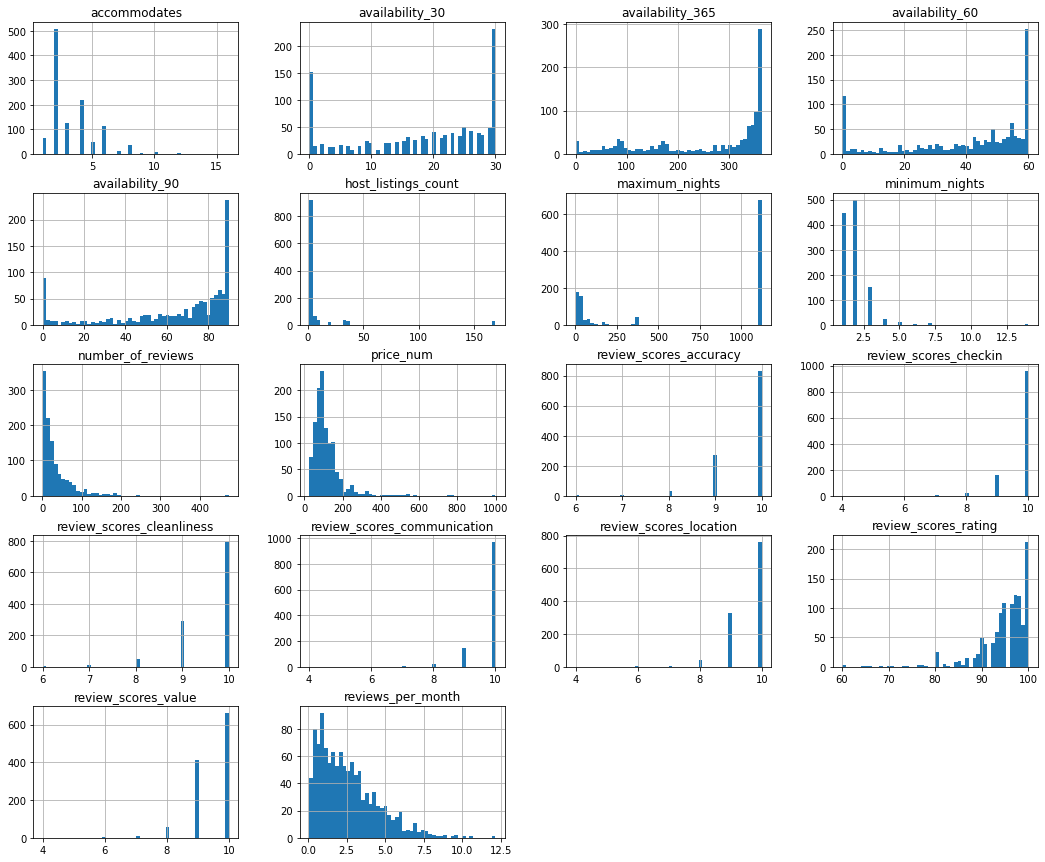

In [48]:
column_index = ['host_listings_count','accommodates','minimum_nights','maximum_nights',
               'availability_30','availability_60','availability_90','availability_365',
               'number_of_reviews','review_scores_rating','review_scores_accuracy',
               'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
               'review_scores_location','review_scores_value','reviews_per_month',
               'price_num']

histogram1 = lis_refined[column_index].hist(bins=50, figsize=(18,15))

We can see the variables are slightley skewed, so we can log transform the variables

In [49]:
# Get a copy of the refined dataset
ln_lis_refined = lis_refined.copy()

# Log transform columns excluding num_found_hepful
for column in ln_lis_refined[column_index]:
    ln_lis_refined[column] = np.log(ln_lis_refined[column] + 1)

# Summary statistics of the log tranformed dataset
ln_lis_refined[column_index].describe().transpose()

count      mean       std       min       25%  \
host_listings_count          1147.0  1.332414  1.004511  0.693147  0.693147   
accommodates                 1147.0  1.384251  0.392628  0.693147  1.098612   
minimum_nights               1147.0  1.009267  0.307255  0.693147  0.693147   
maximum_nights               1147.0  5.578397  1.902030  0.693147  3.433987   
availability_30              1147.0  2.569064  1.153317  0.000000  2.350240   
availability_60              1147.0  3.353359  1.233271  0.000000  3.367296   
availability_90              1147.0  3.834789  1.230300  0.000000  3.951244   
availability_365             1147.0  5.291088  1.022501  0.000000  5.056246   
number_of_reviews            1147.0  2.981343  1.128680  0.693147  2.138333   
review_scores_rating         1147.0  4.560408  0.063234  4.110874  4.543295   
review_scores_accuracy       1147.0  2.366223  0.060743  1.945910  2.302585   
review_scores_cleanliness    1147.0  2.361047  0.064996  1.945910  2.302585   
review_scores_checkin        1147.0  2.379012  0.051337  1.609438  2.397895   
review_scores_communication  1147.0  2.379917  0.051000  1.609438  2.397895   
review_scores_location       1147.0  2.359507  0.065060  1.609438  2.302585   
review_scores_value          1147.0  2.348604  0.071312  1.609438  2.302585   
reviews_per_month            1147.0  1.141935  0.521076  0.058269  0.712938   
price_num                    1147.0  4.596446  0.524339  3.258097  4.262680   

                                  50%       75%       max  
host_listings_count          1.098612  1.386294  5.135798  
accommodates                 1.386294  1.609438  2.833213  
minimum_nights               1.098612  1.098612  2.708050  
maximum_nights               7.026427  7.026427  7.026427  
availability_30              3.091042  3.367296  3.433987  
availability_60              3.891820  4.060443  4.110874  
availability_90              4.343805  4.477337  4.510860  
availability_365             5.780744  5.883322  5.902633  
number_of_reviews            2.995732  3.806662  6.163315  
review_scores_rating         4.574711  4.595120  4.615121  
review_scores_accuracy       2.397895  2.397895  2.397895  
review_scores_cleanliness    2.397895  2.397895  2.397895  
review_scores_checkin        2.397895  2.397895  2.397895  
review_scores_communication  2.397895  2.397895  2.397895  
review_scores_location       2.397895  2.397895  2.397895  
review_scores_value          2.397895  2.397895  2.397895  
reviews_per_month            1.147402  1.533636  2.576422  
price_num                    4.564348  4.912655  6.907755

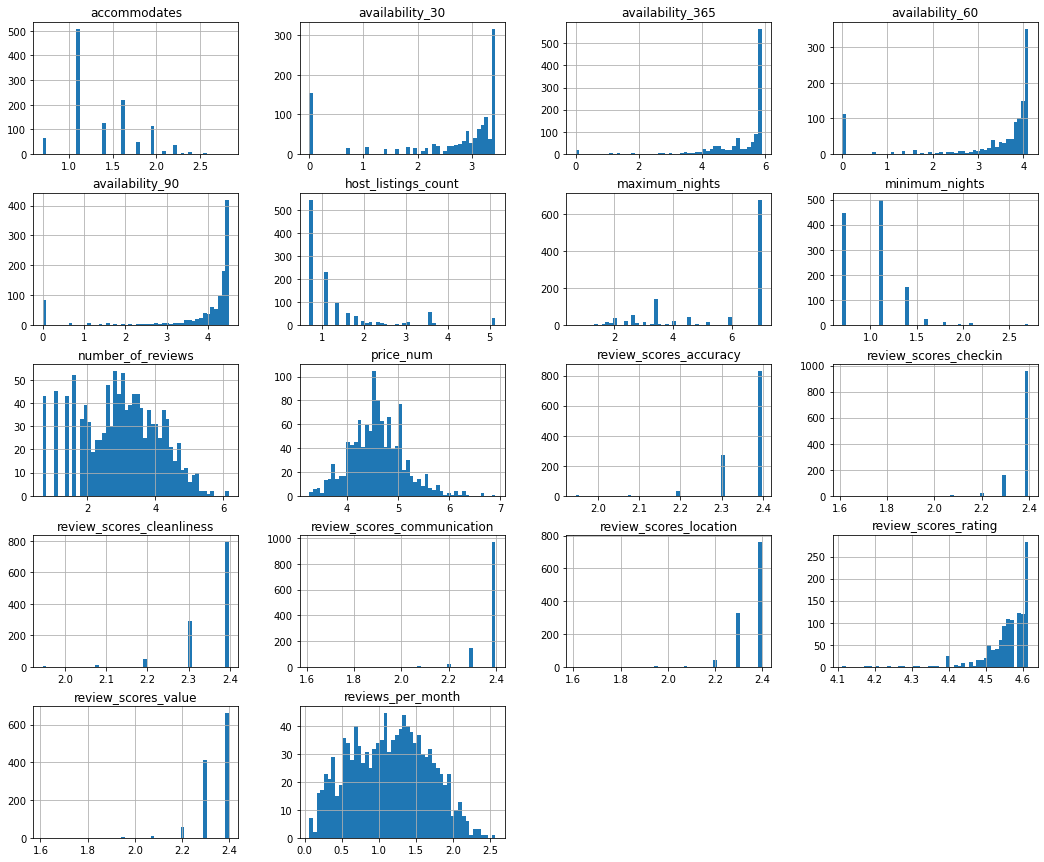

In [50]:
# Show histograms of log transformed variables
historam2 = ln_lis_refined[column_index].hist(bins=50, figsize=(18,15))

We can see that this transformation did help the distribution of some of the variables.

## 3.6 Visualizations

First, let's see what the ratings distribution is among hosts versus superhosts

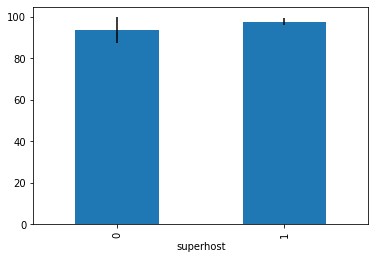

In [51]:
mean_review_by_host_id = lis[['superhost','review_scores_rating']].groupby('superhost').mean()

# standard error
std1 = lis[['superhost', 'review_scores_rating']].groupby('superhost').std()

mean_review_by_host_id.plot(kind='bar', yerr=std1, legend=False)

From this bar chart, we can see that superhosts have, on average, a higher rating score than just normal hosts on Airbnb. We can also see that there is more variation on an average score for a typcial host.

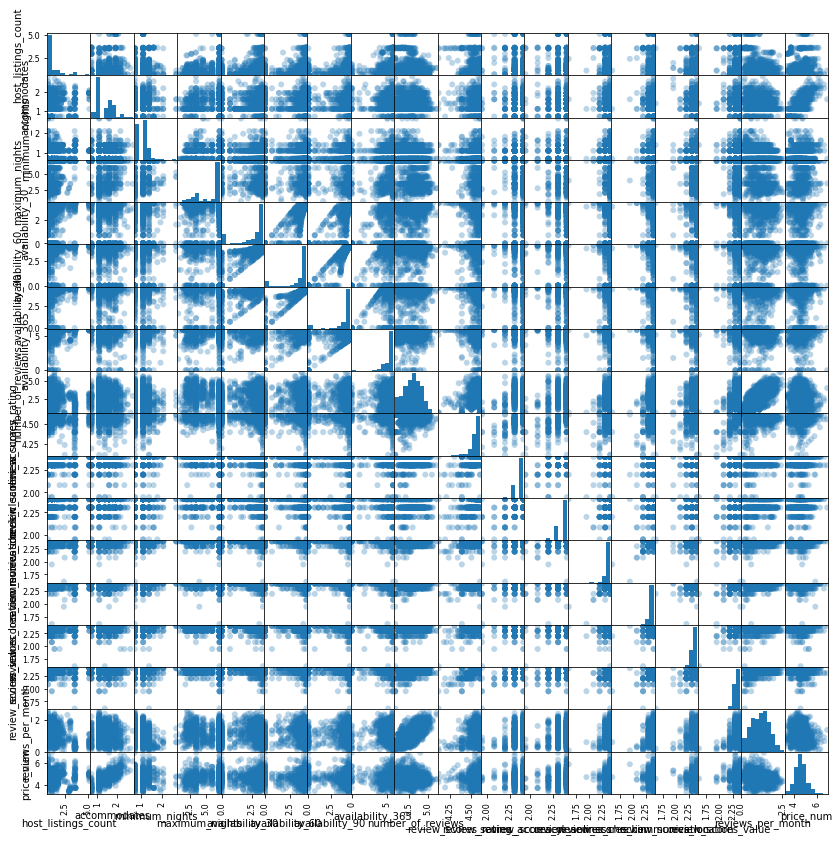

In [52]:
scatterplot = pd.plotting.scatter_matrix(ln_lis_refined[column_index],
                           alpha=0.3,
                           figsize=(14, 14),
                           diagonal='hist',
                           marker='o',
                           grid=True)

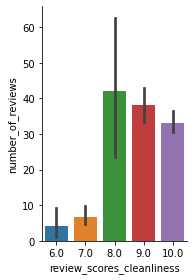

In [53]:
# Catplot
g = sns.catplot(x="review_scores_cleanliness", y="number_of_reviews",
                   data=lis, kind="bar",
                   height=4, aspect=.7);

The data reveals that on average, most people only review the listings if the cleanliness is higher than a seven. The review cleanliness average is around eight and a half.

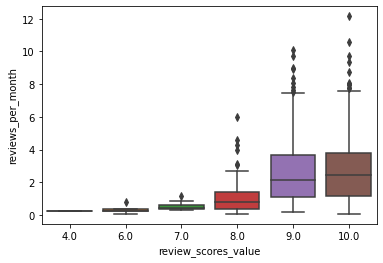

In [54]:
# Boxplot
Average_Review = sns.boxplot(x="review_scores_value", y="reviews_per_month", data=lis);

From the results of the boxplot, results show that most of the reviews during the month are predominately high scores above eight. The most outliers range from a score value of eight through ten.

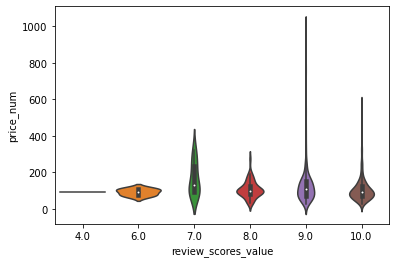

In [55]:
# Violinplot
Review_Accuracy = sns.violinplot(x = lis["review_scores_value"], y = lis["price_num"])

The violinplot reveals that price has little effect on the score value. The average price is almost identical no matter the review score.

# 4. Regression Analysis

First, we need to create X and y datasets to represent our predictors and dependent variables

In [56]:
from patsy import dmatrices

# create the design matrices
y, X = dmatrices('superhost ~ host_listings_count + accommodates +' + 
                 'minimum_nights + maximum_nights + availability_30 +' + 
                 'availability_60 + availability_90 + availability_365 +' +
                 'number_of_reviews + review_scores_rating + review_scores_accuracy +' +
                 'review_scores_cleanliness + review_scores_checkin +' +
                 'review_scores_communication + review_scores_location +' +
                 'review_scores_value + reviews_per_month + price_num',
                 data = lis_refined,
                 return_type = 'dataframe')

In [57]:
y.shape

(1147, 1)

In [58]:
X.shape

(1147, 19)

In [59]:
import statsmodels.api as sm

In [60]:
# Describe the linear model
mod = sm.OLS(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              superhost   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     14.79
Date:                Sun, 03 May 2020   Prob (F-statistic):           6.59e-41
Time:                        20:27:51   Log-Likelihood:                -624.57
No. Observations:                1147   AIC:                             1287.
Df Residuals:                    1128   BIC:                             1383.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.5517      0.317     -8.044      0.000      -3.174      -1.929
host_listings_count            -0.0007      0.000     -1.489      0.137      -0.002       0.000
accommodates                   -0.0135      0.009     -1.514      0.130      -0.031       0.004
minimum_nights                  0.0072      0.011      0.653      0.514      -0.014       0.029
maximum_nights              -6.208e-05   2.57e-05     -2.419      0.016      -0.000   -1.17e-05
availability_30                -0.0011      0.003     -0.343      0.731      -0.007       0.005
availability_60                 0.0012      0.004      0.329      0.742      -0.006       0.008
availability_90                -0.0014      0.002     -0.724      0.469      -0.005       0.002
availability_365             9.068e-05      0.000      0.711      0.477      -0.000       0.000
number_of_reviews               0.0009      0.000      2.353      0.019       0.000       0.002
review_scores_rating            0.0098      0.004      2.613      0.009       0.002       0.017
review_scores_accuracy          0.0300      0.029      1.031      0.303      -0.027       0.087
review_scores_cleanliness       0.0896      0.026      3.423      0.001       0.038       0.141
review_scores_checkin           0.0437      0.035      1.248      0.212      -0.025       0.112
review_scores_communication    -0.0056      0.036     -0.156      0.876      -0.076       0.065
review_scores_location         -0.0510      0.023     -2.209      0.027      -0.096      -0.006
review_scores_value             0.0945      0.027      3.563      0.000       0.042       0.147
reviews_per_month               0.0194      0.009      2.158      0.031       0.002       0.037
price_num                       0.0003      0.000      1.511      0.131   -9.85e-05       0.001
==============================================================================
Omnibus:                    20304.848   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.822
Skew:                           0.457   Prob(JB):                     1.75e-28
Kurtosis:                       1.644   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# create the design matrices
y, X = dmatrices('superhost ~ host_listings_count + accommodates +' + 
                 'minimum_nights + maximum_nights + availability_30 +' + 
                 'availability_60 + availability_90 + availability_365 +' +
                 'number_of_reviews + review_scores_rating + review_scores_accuracy +' +
                 'review_scores_cleanliness + review_scores_checkin +' +
                 'review_scores_communication + review_scores_location +' +
                 'review_scores_value + reviews_per_month + price_num',
                 data = ln_lis_refined,
                 return_type = 'dataframe')

y = lis['superhost'].copy()
y.head()
y.shape

# Describe the linear model
mod = sm.OLS(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              superhost   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     18.05
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.75e-50
Time:                        20:27:51   Log-Likelihood:                -600.87
No. Observations:                1147   AIC:                             1240.
Df Residuals:                    1128   BIC:                             1336.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.7670      1.035     -7.503      0.000      -9.798      -5.736
host_listings_count            -0.0019      0.014     -0.134      0.894      -0.030       0.026
accommodates                   -0.1574      0.045     -3.502      0.000      -0.246      -0.069
minimum_nights                  0.0363      0.043      0.845      0.398      -0.048       0.120
maximum_nights                 -0.0063      0.007     -0.915      0.360      -0.020       0.007
availability_30                -0.0383      0.025     -1.516      0.130      -0.088       0.011
availability_60                 0.0065      0.043      0.153      0.879      -0.077       0.090
availability_90                -0.0034      0.033     -0.104      0.917      -0.067       0.061
availability_365               -0.0109      0.015     -0.749      0.454      -0.039       0.018
number_of_reviews               0.1024      0.016      6.573      0.000       0.072       0.133
review_scores_rating            0.7046      0.323      2.182      0.029       0.071       1.338
review_scores_accuracy          0.2787      0.282      0.989      0.323      -0.274       0.832
review_scores_cleanliness       0.9608      0.254      3.777      0.000       0.462       1.460
review_scores_checkin           0.4298      0.336      1.280      0.201      -0.229       1.089
review_scores_communication    -0.2171      0.347     -0.626      0.532      -0.898       0.464
review_scores_location         -0.5774      0.223     -2.591      0.010      -1.015      -0.140
review_scores_value             0.9678      0.261      3.705      0.000       0.455       1.480
reviews_per_month               0.0004      0.037      0.012      0.991      -0.072       0.073
price_num                       0.1268      0.035      3.639      0.000       0.058       0.195
==============================================================================
Omnibus:                     1585.067   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.933
Skew:                           0.451   Prob(JB):                     1.10e-25
Kurtosis:                       1.738   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above regression, we found that:

- Number of reviews has a positive effect on being a Superhost. Increasing 1 review  would increase status by .10 units after controlling for other factors. This effect of number of reviews on superhost is statistically significant (P<0.001)


- The review scores of cleanliness has a positive effect on being a Superhost. Increasing 1 review  would increase status by .96 units after controlling for other factors. This effect of number of reviews on superhost is statistically significant (P<0.001)

- The review scores value has a positive effect on being a Superhost. Increasing 1 review  would increase status by .96 units after controlling for other factors. This effect of number of reviews on superhost is statistically significant (P<0.001)

- Accommodates has a negative effect on being a Superhost. This effect of number of accommodates on superhost is statistically significant (P<0.001)


- The coefficient of review scores value is estimated as 0.9678. The review score is is statistically significant which would indicate that the review score on average leads to a higher superhost rating even compared to the scoring of cleanliness. 




# 5. Predictive Modeling

## 5.1 Data Partition and Preprocessing

In [62]:
from sklearn.model_selection import train_test_split

# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.2,
                                                 random_state=123)

from sklearn import preprocessing

# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_X)

# Transform training X
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

train_X_scale.describe().transpose()

# Transform test X
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

test_X_scale.describe().transpose()

count      mean       std       min       25%  \
Intercept                    230.0  0.000000  0.000000  0.000000  0.000000   
host_listings_count          230.0  0.147086  0.226218  0.000000  0.000000   
accommodates                 230.0  0.365762  0.206211  0.000000  0.201233   
minimum_nights               230.0  0.165387  0.148231  0.000000  0.000000   
maximum_nights               230.0  0.764804  0.299898  0.000000  0.432768   
availability_30              230.0  0.754163  0.314083  0.000000  0.698283   
availability_60              230.0  0.833617  0.263584  0.000000  0.821181   
availability_90              230.0  0.860443  0.246057  0.000000  0.875940   
availability_365             230.0  0.902067  0.149235  0.000000  0.863221   
number_of_reviews            230.0  0.409457  0.210333  0.000000  0.253428   
review_scores_rating         230.0  0.888345  0.139807  0.000000  0.857558   
review_scores_accuracy       230.0  0.932222  0.135356  0.000000  0.789130   
review_scores_cleanliness    230.0  0.914976  0.135292  0.295433  0.789130   
review_scores_checkin        230.0  0.931903  0.221400 -1.475893  1.000000   
review_scores_communication  230.0  0.932793  0.227163 -1.475893  1.000000   
review_scores_location       230.0  0.949885  0.084075  0.426748  0.879118   
review_scores_value          230.0  0.937551  0.088205  0.426748  0.879118   
reviews_per_month            230.0  0.425452  0.216180  0.007423  0.240535   
price_num                    230.0  0.376683  0.150843  0.020305  0.293901   

                                  50%       75%       max  
Intercept                    0.000000  0.000000  0.000000  
host_listings_count          0.000000  0.206249  1.000000  
accommodates                 0.344010  0.454757  1.062119  
minimum_nights               0.201233  0.201233  0.688020  
maximum_nights               1.000000  1.000000  1.000000  
availability_30              0.879481  0.980579  1.000000  
availability_60              0.931345  0.990851  1.000000  
availability_90              0.954156  0.992568  1.000000  
availability_365             0.977245  0.995782  1.000000  
number_of_reviews            0.438359  0.551035  0.996895  
review_scores_rating         0.919862  0.980267  1.000000  
review_scores_accuracy       1.000000  1.000000  1.000000  
review_scores_cleanliness    1.000000  1.000000  1.000000  
review_scores_checkin        1.000000  1.000000  1.000000  
review_scores_communication  1.000000  1.000000  1.000000  
review_scores_location       1.000000  1.000000  1.000000  
review_scores_value          1.000000  1.000000  1.000000  
reviews_per_month            0.420352  0.584603  0.933413  
price_num                    0.360735  0.480193  0.930513

In [63]:
train_X.shape

(917, 19)

In [64]:
train_y.shape

(917,)

In [65]:
test_y.shape

(230,)

In [66]:
test_X.shape

(230, 19)

## 5.2 k-NN 

### 5.2.1 Train K-NN Classifier

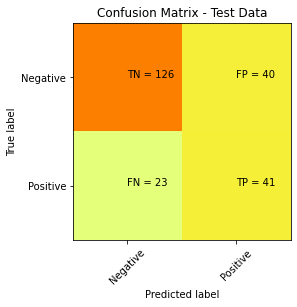

In [67]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

knn5.fit(train_X_scale, train_y)

pred_y_knn5 = knn5.predict(test_X_scale)

from sklearn import metrics

# Print confusion matrix
import matplotlib.pyplot as plt
import numpy as np
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
cm = metrics.confusion_matrix(test_y, pred_y_knn5)
print_cm(cm)

In [68]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_knn5))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       166
           1       0.51      0.64      0.57        64

    accuracy                           0.73       230
   macro avg       0.68      0.70      0.68       230
weighted avg       0.75      0.73      0.73       230



### 5.2.2 Tune the k-NN Classifier

In [69]:
from sklearn import neighbors
import numpy as np
from sklearn import metrics
for k in range(30):
    k = k + 1
    knn = neighbors.KNeighborsRegressor(n_neighbors = k, 
                                        weights='uniform', 
                                        algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("RMSE is ", round(np.sqrt(metrics.mean_squared_error(test_y, pred_y)),3)," for k =",k)
    

RMSE is  0.548  for k = 1
RMSE is  0.469  for k = 2
RMSE is  0.459  for k = 3
RMSE is  0.432  for k = 4
RMSE is  0.435  for k = 5
RMSE is  0.424  for k = 6
RMSE is  0.413  for k = 7
RMSE is  0.412  for k = 8
RMSE is  0.407  for k = 9
RMSE is  0.404  for k = 10
RMSE is  0.396  for k = 11
RMSE is  0.391  for k = 12
RMSE is  0.389  for k = 13
RMSE is  0.392  for k = 14
RMSE is  0.387  for k = 15
RMSE is  0.387  for k = 16
RMSE is  0.389  for k = 17
RMSE is  0.389  for k = 18
RMSE is  0.388  for k = 19
RMSE is  0.388  for k = 20
RMSE is  0.389  for k = 21
RMSE is  0.388  for k = 22
RMSE is  0.39  for k = 23
RMSE is  0.389  for k = 24
RMSE is  0.392  for k = 25
RMSE is  0.391  for k = 26
RMSE is  0.392  for k = 27
RMSE is  0.392  for k = 28
RMSE is  0.393  for k = 29
RMSE is  0.392  for k = 30


If we use RMSE as the measure, the optimal hyperparameter is k = 15 and k = 16. 

In [70]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("Accuracy is ", metrics.accuracy_score(test_y, pred_y)*100,"% for k =",k)

Accuracy is  70.0 % for k = 1
Accuracy is  73.47826086956522 % for k = 2
Accuracy is  72.60869565217392 % for k = 3
Accuracy is  75.65217391304347 % for k = 4
Accuracy is  72.60869565217392 % for k = 5
Accuracy is  76.95652173913044 % for k = 6
Accuracy is  75.65217391304347 % for k = 7
Accuracy is  75.65217391304347 % for k = 8
Accuracy is  73.47826086956522 % for k = 9
Accuracy is  76.08695652173914 % for k = 10
Accuracy is  76.95652173913044 % for k = 11
Accuracy is  76.52173913043478 % for k = 12
Accuracy is  76.52173913043478 % for k = 13
Accuracy is  74.78260869565217 % for k = 14
Accuracy is  77.39130434782608 % for k = 15
Accuracy is  77.82608695652173 % for k = 16
Accuracy is  76.52173913043478 % for k = 17
Accuracy is  76.52173913043478 % for k = 18
Accuracy is  76.95652173913044 % for k = 19
Accuracy is  76.95652173913044 % for k = 20


If we use overall accuracy as the measure, the optimal hyperparameter is k = 16. 

In [71]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("AUC is ", round(metrics.roc_auc_score(test_y, pred_y)*100,2),"% for k =",k)

AUC is  68.18 % for k = 1
AUC is  62.9 % for k = 2
AUC is  70.94 % for k = 3
AUC is  67.77 % for k = 4
AUC is  69.98 % for k = 5
AUC is  69.15 % for k = 6
AUC is  73.05 % for k = 7
AUC is  70.17 % for k = 8
AUC is  72.51 % for k = 9
AUC is  71.91 % for k = 10
AUC is  75.4 % for k = 11
AUC is  71.25 % for k = 12
AUC is  73.17 % for k = 13
AUC is  69.09 % for k = 14
AUC is  75.7 % for k = 15
AUC is  73.12 % for k = 16
AUC is  73.65 % for k = 17
AUC is  70.77 % for k = 18
AUC is  72.52 % for k = 19
AUC is  71.07 % for k = 20


If we use overall AUC as the measure, the optimal hyperparameter is still k = 16. 

In [72]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("Cohen's Kappa is ", round(metrics.cohen_kappa_score(test_y, pred_y)*100,2),"% for k =",k)

Cohen's Kappa is  32.74 % for k = 1
Cohen's Kappa is  28.1 % for k = 2
Cohen's Kappa is  38.05 % for k = 3
Cohen's Kappa is  36.96 % for k = 4
Cohen's Kappa is  36.95 % for k = 5
Cohen's Kappa is  40.04 % for k = 6
Cohen's Kappa is  43.2 % for k = 7
Cohen's Kappa is  39.96 % for k = 8
Cohen's Kappa is  40.54 % for k = 9
Cohen's Kappa is  42.4 % for k = 10
Cohen's Kappa is  46.96 % for k = 11
Cohen's Kappa is  42.1 % for k = 12
Cohen's Kappa is  44.22 % for k = 13
Cohen's Kappa is  37.81 % for k = 14
Cohen's Kappa is  47.73 % for k = 15
Cohen's Kappa is  45.58 % for k = 16
Cohen's Kappa is  44.73 % for k = 17
Cohen's Kappa is  41.55 % for k = 18
Cohen's Kappa is  43.97 % for k = 19
Cohen's Kappa is  42.35 % for k = 20


If we use overall Cohen's Kappa as the measure, the optimal hyperparameter is k = 15.

### 5.2.3 Compare the Two KNN Regression

In [73]:
knn16 = neighbors.KNeighborsRegressor(n_neighbors = 16, 
                                      weights='uniform', 
                                      algorithm='auto')
knn16.fit(train_X_scale, train_y)
pred_y_knn16 = knn16.predict(test_X_scale)

print("RMSE =", round(np.sqrt(metrics.mean_squared_error(test_y, pred_y_knn16)),3))
print("MAE =", round(metrics.mean_absolute_error(test_y, pred_y_knn16),3))
print("R2 =", round(metrics.r2_score(test_y, pred_y_knn16),3))

RMSE = 0.387
MAE = 0.326
R2 = 0.253


In [74]:
knn15 = neighbors.KNeighborsRegressor(n_neighbors = 15, 
                                      weights='uniform', 
                                      algorithm='auto')
knn15.fit(train_X_scale, train_y)
pred_y_knn15 = knn15.predict(test_X_scale)

print("RMSE =", round(np.sqrt(metrics.mean_squared_error(test_y, pred_y_knn15)),3))
print("MAE =", round(metrics.mean_absolute_error(test_y, pred_y_knn15),3))
print("R2 =", round(metrics.r2_score(test_y, pred_y_knn15),3))

RMSE = 0.387
MAE = 0.324
R2 = 0.253


The RMSE and R2 values of knn15 and knn16 are the same, but MAE of knn15 is lower than knn16, so knn15 is slightly better.

## 5.3 Logistic Regression Classifier
### 5.3.1 Logistic Regression without Class Weight

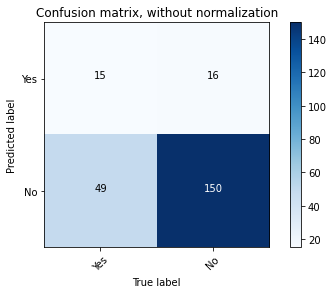

In [75]:
from sklearn.linear_model import LogisticRegression
import itertools
logit1 = LogisticRegression(solver='liblinear')

logit1.fit(train_X, train_y)
pred_y_logit1 = logit1.predict(test_X)

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.plot()
    
from sklearn import metrics

# Compute confusion matrix
cnf_matrix_logit1 = metrics.confusion_matrix(pred_y_logit1, test_y, labels=[1,0])

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_logit1, classes=['Yes','No'],
                      title='Confusion matrix, without normalization')

### 5.3.2 Logistic Regression with Class Weight

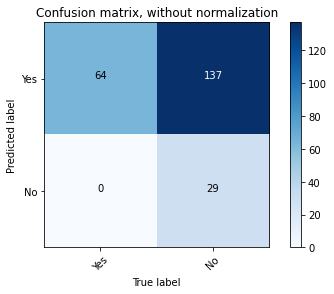

In [76]:
# Assign class_weight as 10 for class 1 (class 0 will have 1 as class weight by default)
logit2 = LogisticRegression(class_weight={1:10}, solver='liblinear')
logit2.fit(train_X, train_y)

pred_y_logit2 = logit2.predict(test_X)

# Compute confusion matrix
cnf_matrix_logit2 = metrics.confusion_matrix(pred_y_logit2, test_y, labels = [1,0])

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_logit2, classes=['Yes','No'],
                      title='Confusion matrix, without normalization')

In [77]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_logit2))

              precision    recall  f1-score   support

           0       1.00      0.17      0.30       166
           1       0.32      1.00      0.48        64

    accuracy                           0.40       230
   macro avg       0.66      0.59      0.39       230
weighted avg       0.81      0.40      0.35       230



### 5.3.3 Compare the Two Logistic Regression

In [78]:
acc = [metrics.accuracy_score(test_y, pred_y_logit1),
       metrics.accuracy_score(test_y, pred_y_logit2)]

pre = [metrics.precision_score(test_y, pred_y_logit1),
       metrics.precision_score(test_y, pred_y_logit2)]

rec = [metrics.recall_score(test_y, pred_y_logit1),
       metrics.recall_score(test_y, pred_y_logit2)]

f1  = [metrics.f1_score(test_y, pred_y_logit1),
       metrics.f1_score(test_y, pred_y_logit2)]

pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['without Class Weight','with Class Weight'])

Accuracy  Precision    Recall  F1 Score
without Class Weight  0.717391   0.483871  0.234375  0.315789
with Class Weight     0.404348   0.318408  1.000000  0.483019

## 5.4 Support Vector Classifier with Class Weight

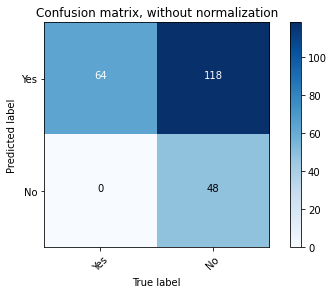

In [79]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', class_weight={1: 10})
svc.fit(train_X, train_y)
pred_y_svc = svc.predict(test_X)

# Compute confusion matrix
cnf_matrix_svc = metrics.confusion_matrix(pred_y_svc, test_y, labels=[1,0])

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_svc, classes=['Yes','No'],
                      title='Confusion matrix, without normalization')

In [80]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_svc))

              precision    recall  f1-score   support

           0       1.00      0.29      0.45       166
           1       0.35      1.00      0.52        64

    accuracy                           0.49       230
   macro avg       0.68      0.64      0.48       230
weighted avg       0.82      0.49      0.47       230



## 5.5 Naive Bayes

### 5.5.1  Gaussian Naive Bayes Classifier

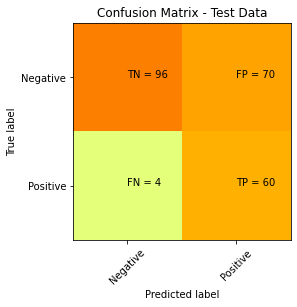

In [81]:
# Gaussian Naive Bayes (GaussianNB) for classification. The likelihood of features is assumed to be Gaussian.
from sklearn import naive_bayes
gauss_nb = naive_bayes.GaussianNB()

gauss_nb.fit(train_X, train_y)

pred_y_gnb = gauss_nb.predict(test_X)

# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_gnb))

In [82]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_gnb))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72       166
           1       0.46      0.94      0.62        64

    accuracy                           0.68       230
   macro avg       0.71      0.76      0.67       230
weighted avg       0.82      0.68      0.69       230



### 5.5.2 Bernoulli Naive Bayes Classifier

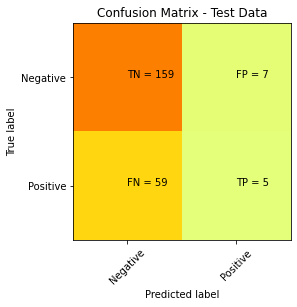

In [83]:
# Naive Bayes classifier for multivariate Bernoulli models
bernou_nb = naive_bayes.BernoulliNB()

bernou_nb.fit(train_X, train_y)

pred_y_bnb = bernou_nb.predict(test_X)

# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_bnb))

In [84]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_bnb))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       166
           1       0.42      0.08      0.13        64

    accuracy                           0.71       230
   macro avg       0.57      0.52      0.48       230
weighted avg       0.64      0.71      0.63       230



### 5.5.3 Compare the Two Naive Bayes Models

In [85]:
acc = [metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_bnb)]

pre = [metrics.precision_score(test_y, pred_y_gnb),
       metrics.precision_score(test_y, pred_y_bnb)]

rec = [metrics.recall_score(test_y, pred_y_gnb),
       metrics.recall_score(test_y, pred_y_bnb)]

f1  = [metrics.f1_score(test_y, pred_y_gnb),
       metrics.f1_score(test_y, pred_y_bnb)]

pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['Gaussian Naive Bayes','Bernoulli Naive Bayes'])

Accuracy  Precision    Recall  F1 Score
Gaussian Naive Bayes   0.678261   0.461538  0.937500  0.618557
Bernoulli Naive Bayes  0.713043   0.416667  0.078125  0.131579

## 5.6 Decision Tree Classifier

In [86]:
from sklearn import tree
# Decision trees for classification, use entropy criterion (gini by default)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
# Import modules
import pydotplus
from IPython.display import Image

# Export the decision tree as a graphviz dot object
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X.columns,
                                class_names= ['Good', 'Bad'],
                                filled=True, rounded=True,
                                special_characters=False)

# Convert the dot data into a graph
graph = pydotplus.graph_from_dot_data(dot_data)

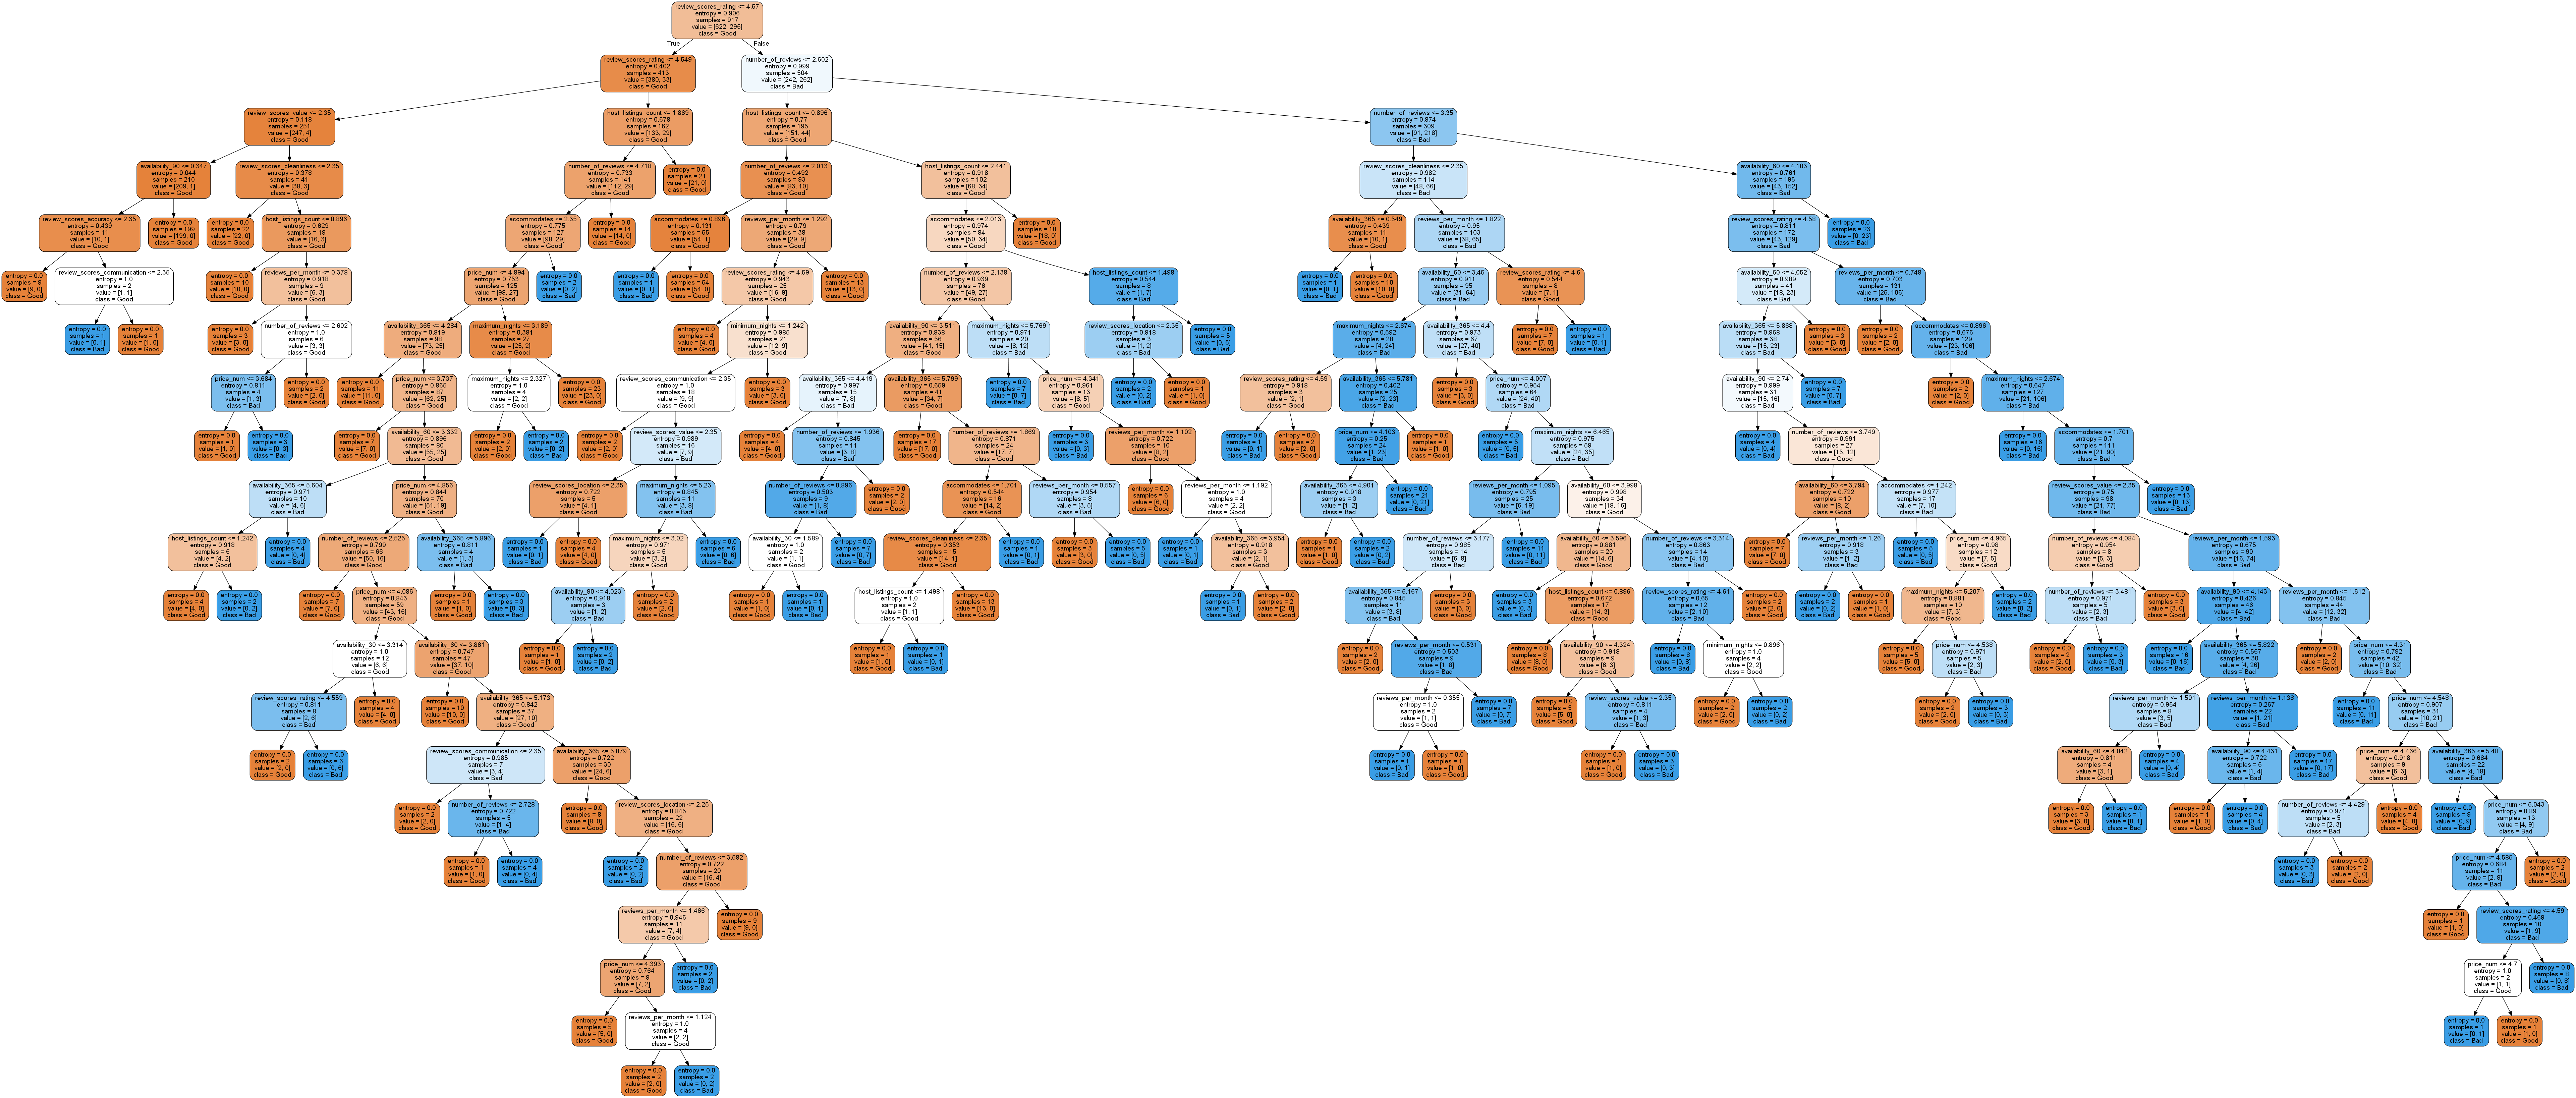

In [88]:
# Show the graph
Image(graph.create_png())

In [89]:
pred_y_dt = dt.predict(test_X)

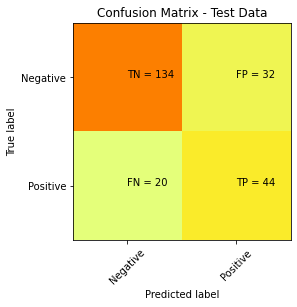

In [90]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_dt))

In [91]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_dt))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       166
           1       0.58      0.69      0.63        64

    accuracy                           0.77       230
   macro avg       0.72      0.75      0.73       230
weighted avg       0.79      0.77      0.78       230



## 5.7 Random Forests

In [92]:
from sklearn.ensemble import RandomForestClassifier
# Train an RF classifier
rf = RandomForestClassifier(n_estimators=5, max_features=10, random_state=123)
rf.fit(train_X,train_y)

# Show feature importance
rf.feature_importances_

array([0.        , 0.03362606, 0.03727686, 0.00938006, 0.02338714,
       0.04727596, 0.05960988, 0.04723864, 0.06299179, 0.1707171 ,
       0.30854999, 0.00689011, 0.01499874, 0.00315341, 0.0014417 ,
       0.00697396, 0.01304213, 0.08794145, 0.06550501])

In [93]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

importance
review_scores_rating           0.308550
number_of_reviews              0.170717
reviews_per_month              0.087941
price_num                      0.065505
availability_365               0.062992
availability_60                0.059610
availability_30                0.047276
availability_90                0.047239
accommodates                   0.037277
host_listings_count            0.033626
maximum_nights                 0.023387
review_scores_cleanliness      0.014999
review_scores_value            0.013042
minimum_nights                 0.009380
review_scores_location         0.006974
review_scores_accuracy         0.006890
review_scores_checkin          0.003153
review_scores_communication    0.001442
Intercept                      0.000000

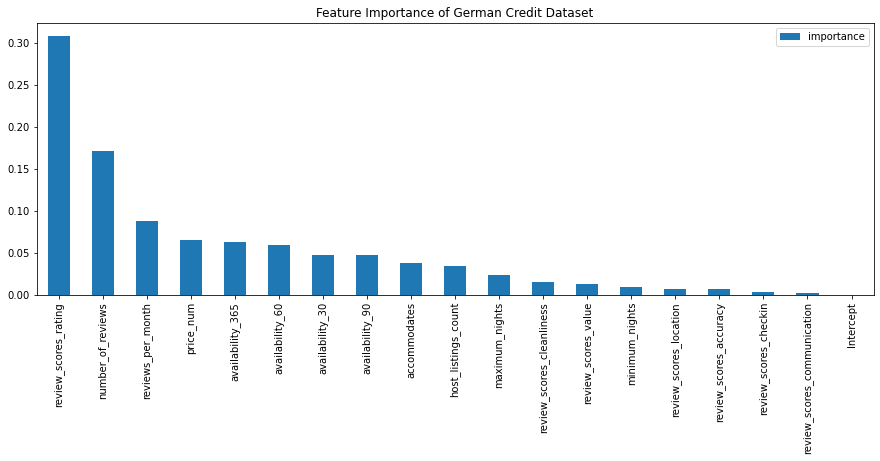

In [94]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of German Credit Dataset')

In [95]:
# Predict on test set
pred_y_rf = rf.predict(test_X)

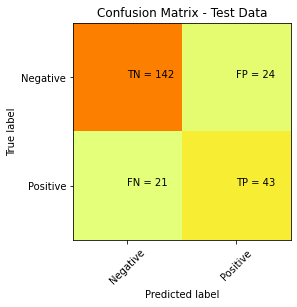

In [96]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_rf))

In [97]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_dt))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       166
           1       0.58      0.69      0.63        64

    accuracy                           0.77       230
   macro avg       0.72      0.75      0.73       230
weighted avg       0.79      0.77      0.78       230



# 6. Summary of All Methods

In [98]:
acc = [metrics.accuracy_score(test_y, pred_y_logit1),
       metrics.accuracy_score(test_y, pred_y_logit2),
       metrics.accuracy_score(test_y, pred_y_svc),
       metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_bnb),
       metrics.accuracy_score(test_y, pred_y_dt),
       metrics.accuracy_score(test_y, pred_y_rf)]

pre = [metrics.precision_score(test_y, pred_y_logit1),
       metrics.precision_score(test_y, pred_y_logit2),
       metrics.precision_score(test_y, pred_y_svc),
       metrics.precision_score(test_y, pred_y_gnb),
       metrics.precision_score(test_y, pred_y_bnb),
       metrics.precision_score(test_y, pred_y_dt),
       metrics.precision_score(test_y, pred_y_rf)]

rec = [metrics.recall_score(test_y, pred_y_logit1),
       metrics.recall_score(test_y, pred_y_logit2),
       metrics.recall_score(test_y, pred_y_svc),
       metrics.recall_score(test_y, pred_y_gnb),
       metrics.recall_score(test_y, pred_y_bnb),
       metrics.recall_score(test_y, pred_y_dt),
       metrics.recall_score(test_y, pred_y_rf)]

f1  = [metrics.f1_score(test_y, pred_y_logit1),
       metrics.f1_score(test_y, pred_y_logit2),
       metrics.f1_score(test_y, pred_y_svc),
       metrics.f1_score(test_y, pred_y_gnb),
       metrics.f1_score(test_y, pred_y_bnb),
       metrics.f1_score(test_y, pred_y_dt),
       metrics.f1_score(test_y, pred_y_rf)]

In [99]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['Logistic Regression with Class Weight',
                      'Logistic Regression without Class Weight',
                      'Support Vector Classifier',
                      'Gaussian Naive Bayes',
                      'Bernoulli Naive Bayes',
                      'Decision Tree',
                      'RF without Hyperparameter Tunning',])

Accuracy  Precision    Recall  \
Logistic Regression with Class Weight     0.717391   0.483871  0.234375   
Logistic Regression without Class Weight  0.404348   0.318408  1.000000   
Support Vector Classifier                 0.486957   0.351648  1.000000   
Gaussian Naive Bayes                      0.678261   0.461538  0.937500   
Bernoulli Naive Bayes                     0.713043   0.416667  0.078125   
Decision Tree                             0.773913   0.578947  0.687500   
RF without Hyperparameter Tunning         0.804348   0.641791  0.671875   

                                          F1 Score  
Logistic Regression with Class Weight     0.315789  
Logistic Regression without Class Weight  0.483019  
Support Vector Classifier                 0.520325  
Gaussian Naive Bayes                      0.618557  
Bernoulli Naive Bayes                     0.131579  
Decision Tree                             0.628571  
RF without Hyperparameter Tunning         0.656489

According to the results, we can see that Random Forest has the highest accuracy, precision and f1 score. So we think it has the best performance among all our models.

# 7. Summary
Choosing the right place to stay when you leave home can be a tricky one to say the least. When it comes to AirBnb no one is more trusted than superhosts. Superhosts are seen by many frequent AirBnb users as the "best of the best", but what exactly makes a "superhost"? In this project, we have conducted an exploratory study on what makes a superhost based on our dataset from kaggle.com This analysis on AirBnb reviews can help us and users better what goes into making a superhost so they can experience the best stay possible when using AirBnb in the future. 

Below is the summarized findings we obtained from the data analysis.


## 7.1. What makes someone a good host and gives them a "superhost" title?
"Superhost" was a term created by AirBnb to help users easily identify the most experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests. This status is easily identifiable by a status badge by their name. After careful analysis we found response time is a major factor in the happiness of an AirBnb guest. Over 60% of the hosts responded with an hour which helps drives up the potential customers overall willingness to rent their property. I know when I have used AirBnb in the past whenever I was not quite sure on something for the rental if the host responded as soon as possible it not only gave me answers to my questions but also showed me that the host is really dedicated to my experience in their property. With our correlation matrix we could clearly see a positive relation to number of reviews, reviews score accuracy, and review scores cleanliness to the hosts overall rating. We also could see that communication and location are highly positive compared to other values which lead us to infer that like mentioned a superhosts rating is mostly based on the ratings of their listings. 


## 7.2. What type(s) of attributes give listings good/bad reviews?
Amenities are probably the most important thing to have when renting an AirBnb. We found that the most common amenities listed were internet, detector, wireless, TV, and dryer to name a few. Without just these few amenities you would see your reviews drop tremendously due to how much guests value these. Also, according to our analysis, the location and quality of the listings and a kind and helpful host are of great importance to guest's experience.

## 7.3. How can we use a predicative model to estimate the quality of listing?
With running our model in section 4 we found that: 
- Number of reviews has a positive effect on being a Superhost. Increasing 1 review would increase status by .10 units after controlling for other factors. This effect of number of reviews on superhost is statistically significant (P<0.001)

- The review scores of cleanliness has a positive effect on being a Superhost. Increasing 1 review would increase status by .96 units after controlling for other factors. This effect of number of reviews on superhost is statistically significant (P<0.001)

- The review scores value has a positive effect on being a Superhost. Increasing 1 review would increase status by .96 units after controlling for other factors. This effect of number of reviews on superhost is statistically significant (P<0.001)

- Accommodates has a negative effect on being a Superhost. This effect of number of accommodates on superhost is statistically significant (P<0.001)

- The coefficient of review scores value is estimated as 0.9678. The review score is is statistically significant which would indicate that the review score on average leads to a higher superhost rating even compared to the scoring of cleanliness


## 7.4. Which listing should we recommend to customers if they have special needs such as religious, pets, parking, disabilities, or children?
As mentioned in 7.2 different amenities are important to different guests so we created a function in 3.3.2 that allows us to search through all the listings to find specific amenities that guests want. This can easily help us recommend which listings guest could look into for their very specific needs like religion, pets, parking, disabilities, or children. 